In [1]:
## Visualization library
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import orchest
## Ignoring Warning during trainings 
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
data = orchest.get_inputs()
train, test = data["data"]

In [3]:
## using isnull will give us bollean data and suming all true will give exact number of missing values.
print("Train Dataset missing data:\n",train.isnull().sum(),"\n")
print("Test Dataset missing data:\n",test.isnull().sum())

Train Dataset missing data:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64 

Test Dataset missing data:
 id             0
keyword       26
location    1105
text           0
dtype: int64


## Visualization

,target
0,4342
1,3271


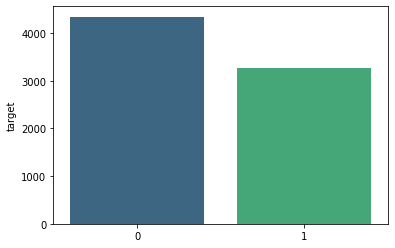

In [4]:
## using pandas value counts on target will give us number of 0's with is non disaster tweets,
## and 1's which is disaster tweets. 
VCtrain=train['target'].value_counts().to_frame()

## seaborn barplot to display barchart
sns.barplot(data=VCtrain,x=VCtrain.index,y="target",palette="viridis")
VCtrain

In [5]:
## Going deep into disaster Tweets
display("Random sample of disaster tweets:",train[train.target==1].text.sample(3).to_frame())
display("Random sample of non disaster tweets:",train[train.target==0].text.sample(3).to_frame())

'Random sample of disaster tweets:'

,text
3606,Boy 11 charged with manslaughter in shooting d...
6055,Gaping sinkhole opens up in Brooklyn New York ...
5091,3 former executives to be prosecuted in Fukush...


'Random sample of non disaster tweets:'

,text
5227,What a win by Kerry. 7-16..... #obliteration
3973,@crabbycale OH MY GOD THE MEMORIES ARE FLOODIN...
1017,@SlikRickDaRula Drake really body bagging peep...


### Most common keywords

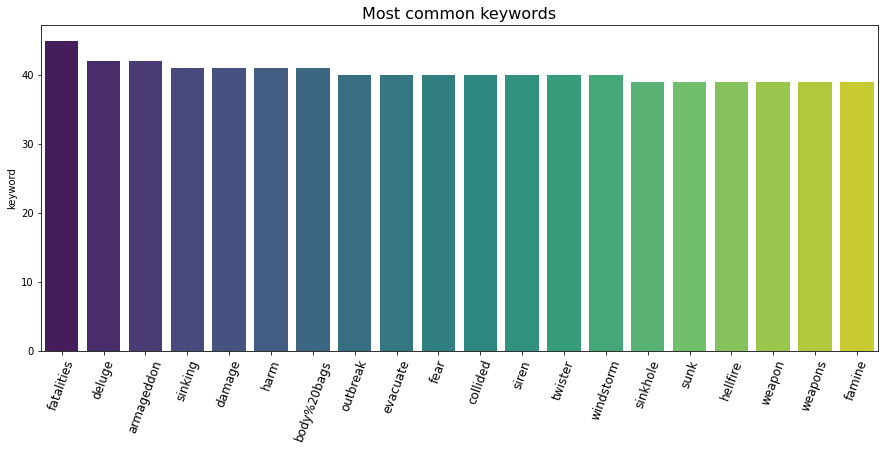

In [6]:
common_keywords=train["keyword"].value_counts()[:20].to_frame()
fig=plt.figure(figsize=(15,6))
sns.barplot(data=common_keywords,x=common_keywords.index,y="keyword",palette="viridis")
plt.title("Most common keywords",size=16)
plt.xticks(rotation=70,size=12);

### Using pie chart 

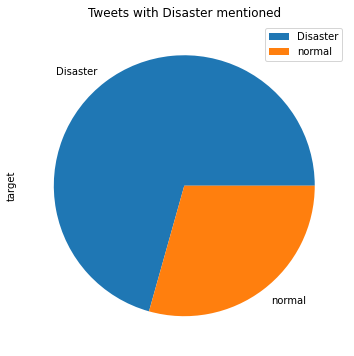

In [7]:
train[train.text.str.contains("disaster")].target.\
 value_counts().to_frame().rename(index={1:"Disaster",0:"normal"}).\
  plot.pie(y="target",figsize=(12,6),title="Tweets with Disaster mentioned");

### Locations

In [8]:
train.location.value_counts()[:10].to_frame()

,location
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26
India,24
Mumbai,22


### word Cloud

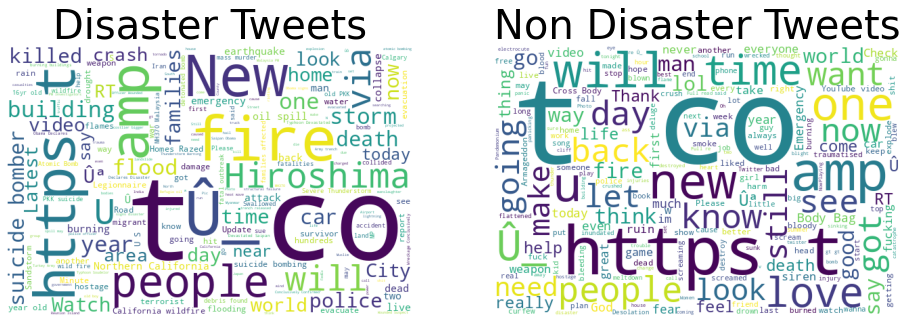

In [9]:
disaster_tweets = train[train['target']==1]['text']
non_disaster_tweets = train[train['target']==0]['text']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);